In [1]:
# Importing libraries for data loading, basic data processing and visualizations

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Data Pre - Processing

In [2]:
# Loading the training and test datasets

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
# Having a look at our training dataset

df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
# Dropping the unnecessary columns

df_train = df_train.drop('Unnamed: 0', axis=1)
df_train = df_train.drop('id', axis=1)

In [5]:
# Having a look at the data types of the features in training dataset

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [6]:
# Having a look at our testing dataset

df_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [7]:
# Dropping the unnecessary columns

df_test = df_test.drop('Unnamed: 0', axis=1)
df_test = df_test.drop('id', axis=1)

In [8]:
# Having a look at the data types of the features in testing dataset

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

In [9]:
# Remapping Sentiments with Numerical Values in training and testing datasets

df_train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
df_test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

In [10]:
# Having a look at the number of Positive and Negative sentiments in training dataset to check the balance

df_train['satisfaction'].value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

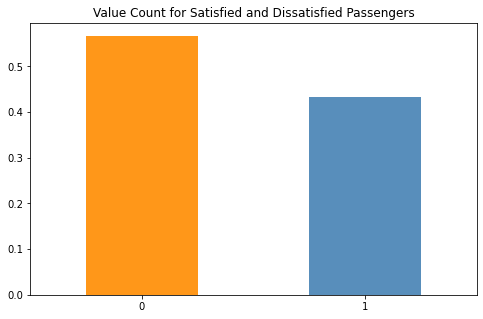

In [11]:
# Visualzing the number of Positive and Negative sentiments

fig = plt.figure(figsize = (8,5))
df_train.satisfaction.value_counts(normalize = True).plot(kind='bar', alpha = 0.9, rot=0, color= ['darkorange','steelblue'])

plt.title('Value Count for Satisfied and Dissatisfied Passengers')
plt.show()

In [12]:
# Checking the number of Null Values in training dataset

df_train.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [13]:
# Checking the number of Null Values in testing dataset

df_test.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [14]:
# Replacing the null values with mean of the feature

df_train['Arrival Delay in Minutes'] = df_train['Arrival Delay in Minutes'].fillna(df_train['Arrival Delay in Minutes'].mean())
df_test['Arrival Delay in Minutes'] = df_test['Arrival Delay in Minutes'].fillna(df_test['Arrival Delay in Minutes'].mean())

### Exploratory Data Analysis

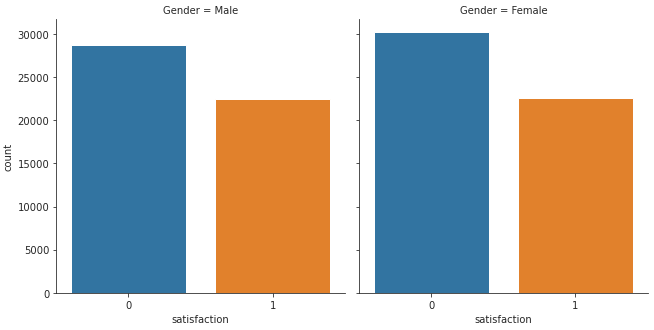

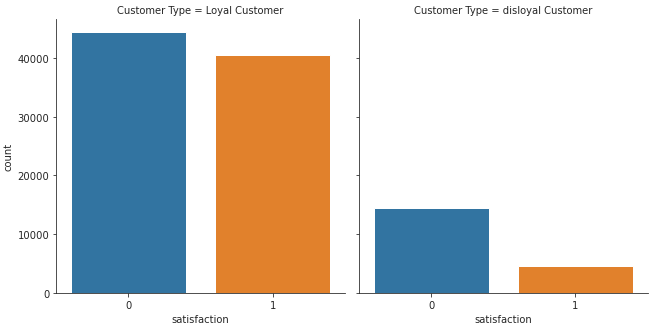

In [15]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Gender", col_wrap=2, data=df_train, kind="count", height=4.5, aspect=1.0)  
    g = sns.catplot("satisfaction", col="Customer Type", col_wrap=2, data=df_train, kind="count", height=4.5, aspect=1.0)

**Gender -**
From the graphs above we can see that passenger dissatisfaction is quite similar across the genders, with female passengers a bit disssatisfied than male passengers.

**Customer Types -**
It can be seen that there are a lot more Loyal Customers for the arline than the disloyal ones, but even though that is the case, there seem to be a lot more disssatisfied customers across both customer types.

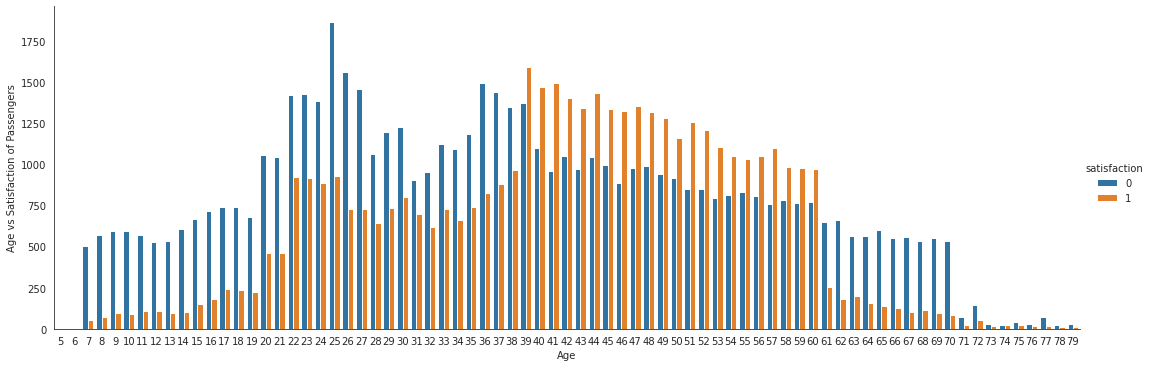

In [16]:
with sns.axes_style('white'):
    g = sns.catplot("Age", data=df_train, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
    g.set_ylabels('Age vs Satisfaction of Passengers')

**Age -**
It is observed that from age 7 to 38 and from age 61 to 79 the number of disssatisfied passengers is comparatively higher, which gives us an insight as to which target group should the airline focus to improve the passenger satisfaction ratings.

On the contrary, we can see that passenger in the age 39 - 60 are satisfied with their experience.

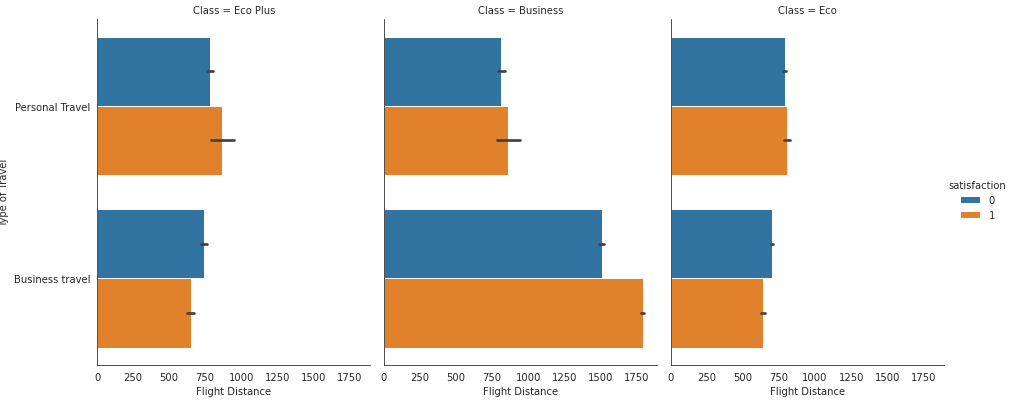

In [17]:
with sns.axes_style('white'):
    g = sns.catplot(x="Flight Distance", y="Type of Travel", hue="satisfaction", col="Class", data=df_train, kind="bar", 
                    height=5.5, aspect=.8)

**Class, Flight Distance and Type of Travel**

We can see that for Eco, Eco Plus and Business class passengers who are travelling for Personal Reasons the number of Satisfied customers are just a bit more than disssatisfied passengers.

Also we can observe an interesting comparision here, the passengers who are traveling for Business Purpose, but are travelling through Eco and Eco Plus class are more disssatisfied, on the contrary the passengers travelling by Business class for Business Purpose are more satisfied. 

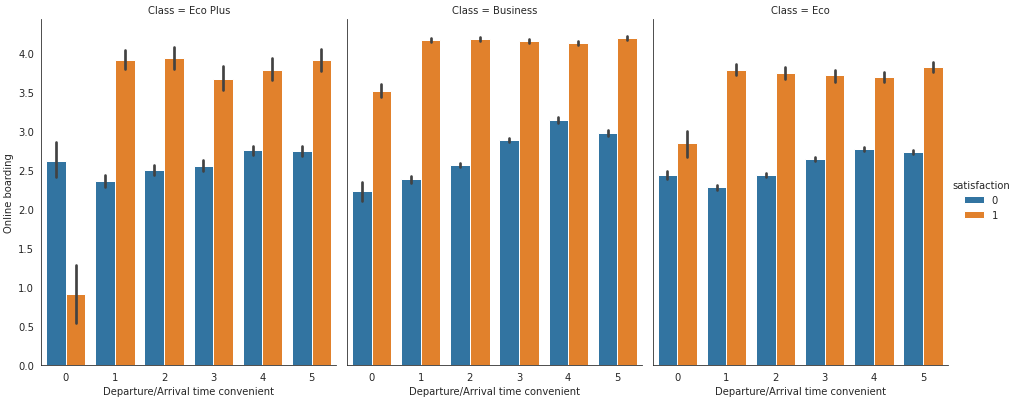

In [18]:
with sns.axes_style('white'):
    g = sns.catplot(x="Departure/Arrival time convenient", y="Online boarding", hue="satisfaction", col="Class", data=df_train, 
                    kind="bar", height=5.5, aspect=.8)

**Departure/Arrival Time, Online Boarding grouped by Class**

Except for the Eco Plus class which has higher number of disssatisfied passengers, where they have provided 0 rating, there seems to be more number of satisfied passengers across classes.

This analysis proves that passengers need convenient features like Online Boarding to make thier flight experience pleasing.

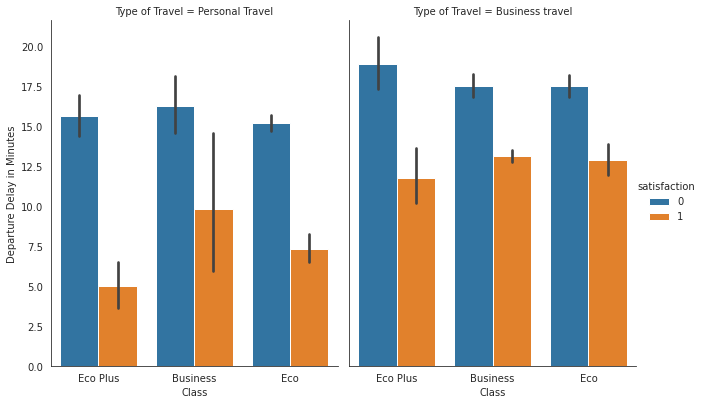

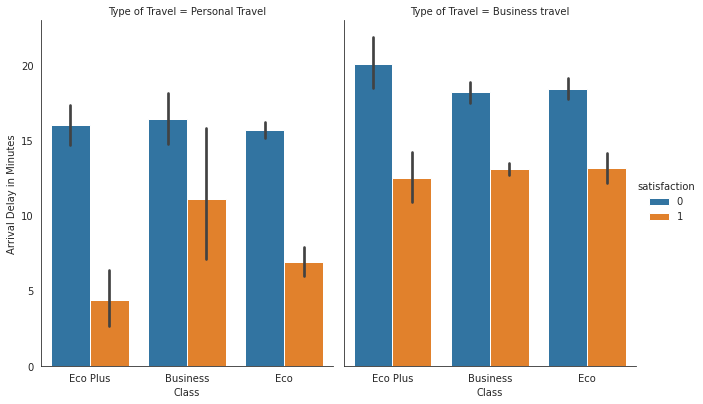

In [19]:
with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Departure Delay in Minutes", hue="satisfaction", col="Type of Travel", data=df_train, 
                    kind="bar", height=5.5, aspect=.8)
    
    g = sns.catplot(x="Class", y="Arrival Delay in Minutes", hue="satisfaction", col="Type of Travel", data=df_train, 
                    kind="bar", height=5.5, aspect=.8)

**Arrival and Departure Delay grouped by Type of Travel**

From the graphs above it is evident that no passenger likes delays. The number of disssatisfied passengers travelling for Business Purpose are greater than those travelling for Personal Reasons.

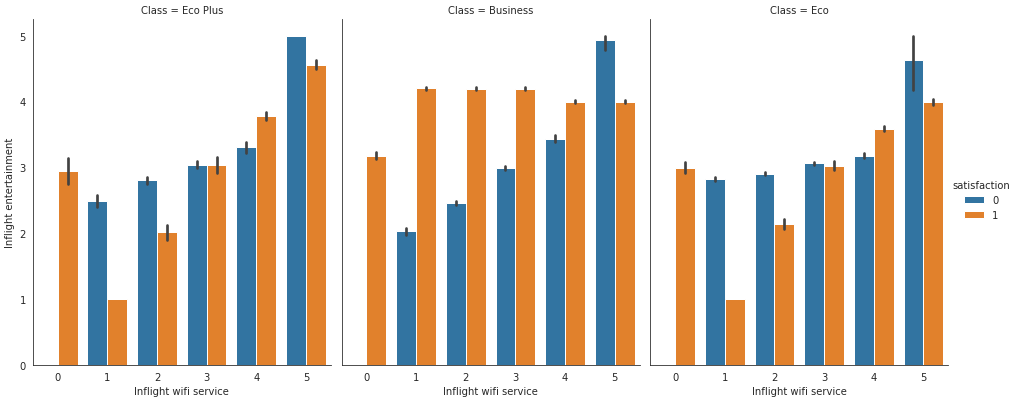

In [20]:
with sns.axes_style('white'):
    g = sns.catplot(x="Inflight wifi service", y="Inflight entertainment", hue="satisfaction", col="Class", data=df_train, 
                    kind="bar", height=5.5, aspect=.8)

**Inflight WiFi and Entertainment grouped by Class**

We have a very unusual stat here, where we can see that Eco Plus passengers are satisfied even if they do not have any WiFi services or just Mid Level of Entertainment.

For Business class passengers it is evident that they need the highest levels of WiFi and Entertainment services as they have paid a significantly higher amount of charges per seat.

For Eco passengers, they need high level of Entertainment and WiFi services to be satisfied.

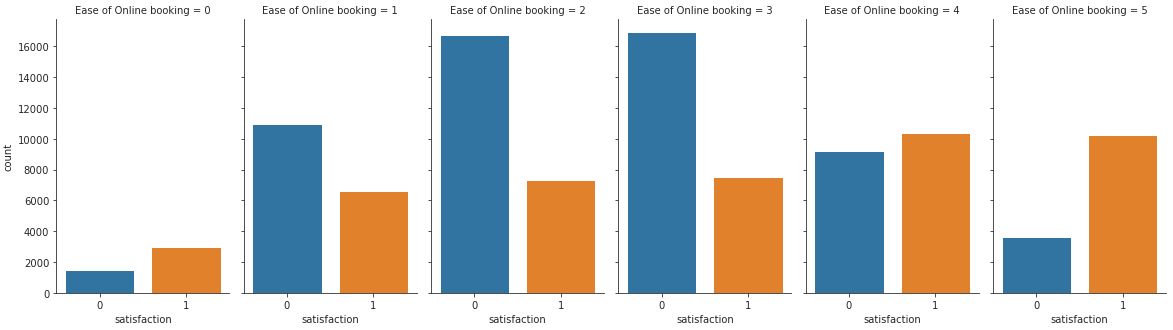

In [21]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Ease of Online booking", col_wrap=6, data=df_train, kind="count", height=4.5, 
                    aspect=.6)

**Ease of Online Booking**

We can see that passengers are only satisfied with the highest level of convenience of ratings 4 and 5 to be satisfied.

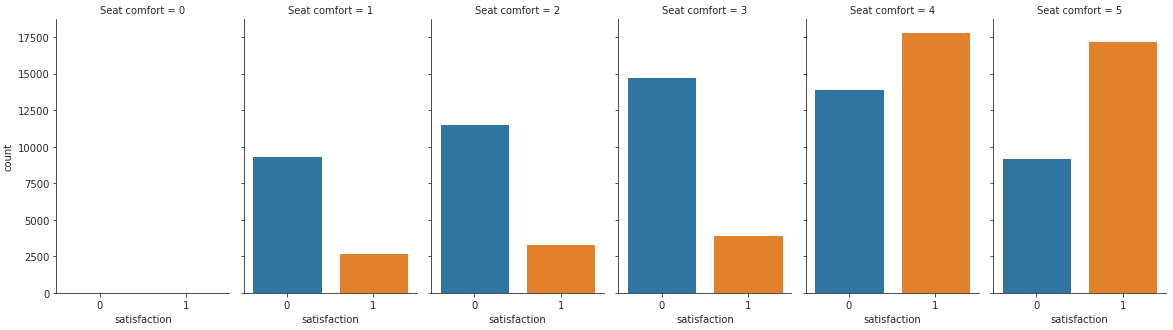

In [22]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Seat comfort", col_wrap=6, data=df_train, kind="count", height=4.5, aspect=.6)

**Seat Comfort**

We can see that passengers are only satisfied with the highest level of seat comforts, where they are probably getting more leg space or window seats which has ratings 4 and 5 to be satisfied.

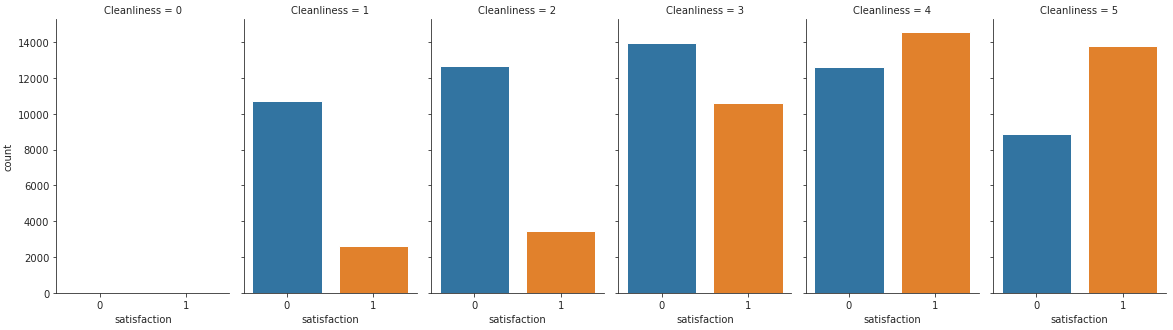

In [23]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Cleanliness", col_wrap=6, data=df_train, kind="count", height=4.5, aspect=.6)

**Cleanliness**

We can see that passengers are only satisfied with the highest level of cleanliness of ratings 4 and 5 to be satisfied.

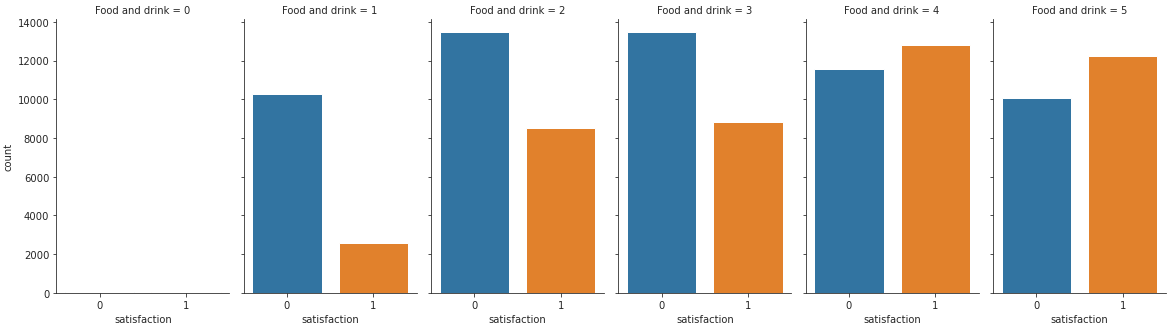

In [24]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Food and drink", col_wrap=6, data=df_train, kind="count", height=4.5, aspect=.6)

**Food and Drinks**

We can see that passengers are only satisfied with the highest level of Food and Drink where they are probably getting all of the requested food and drinks which has ratings 4 and 5 to be satisfied.

<AxesSubplot:xlabel='Leg room service', ylabel='satisfaction'>

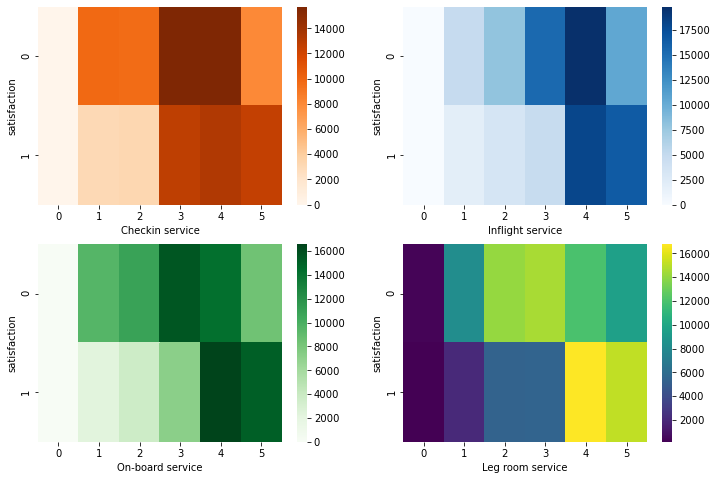

In [25]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

table1 = pd.crosstab(df_train['satisfaction'], df_train['Checkin service'])
sns.heatmap(table1, cmap='Oranges', ax = axarr[0][0])
table2 = pd.crosstab(df_train['satisfaction'], df_train['Inflight service'])
sns.heatmap(table2, cmap='Blues', ax = axarr[0][1])
table3 = pd.crosstab(df_train['satisfaction'], df_train['On-board service'])
sns.heatmap(table3, cmap='Greens', ax = axarr[1][0])
table4 = pd.crosstab(df_train['satisfaction'], df_train['Leg room service'])
sns.heatmap(table4, cmap='viridis', ax = axarr[1][1])

**Checkin Service, Inflight Service, On-Board Service, Leg-room service**

Except for the checkin service, which has 0 to 2 ratings provided by passengers who look to be the most dissatisfied, for rest of services, passengers who provided 4 and 5 ratings seem to be satisfied.

### Data Preparation for Model Building

In [26]:
# Encoding the Categorical variables to be used in our model for training data

from sklearn.preprocessing import LabelEncoder
le_train = {}
for column in df_train.select_dtypes(include=['object']).columns:
    le_train[column] = LabelEncoder()
    df_train[column] = le_train[column].fit_transform(df_train[column])

In [27]:
# Encoding the Categorical variables to be used in our model for testing data

le_test = {}
for column in df_test.select_dtypes(include=['object']).columns:
    le_test[column] = LabelEncoder()
    df_test[column] = le_test[column].fit_transform(df_test[column])

In [28]:
# Detecting the outliers in the dataset 

q1 = df_train.quantile(0.25)
q3 = df_train.quantile(0.75)
inter_q = q3 - q1
print(inter_q)

Gender                                  1.0
Customer Type                           0.0
Age                                    24.0
Type of Travel                          1.0
Class                                   1.0
Flight Distance                      1329.0
Inflight wifi service                   2.0
Departure/Arrival time convenient       2.0
Ease of Online booking                  2.0
Gate location                           2.0
Food and drink                          2.0
Online boarding                         2.0
Seat comfort                            3.0
Inflight entertainment                  2.0
On-board service                        2.0
Leg room service                        2.0
Baggage handling                        2.0
Checkin service                         1.0
Inflight service                        2.0
Cleanliness                             2.0
Departure Delay in Minutes             12.0
Arrival Delay in Minutes               13.0
satisfaction                    

In [29]:
# Removing the outliers in the dataset and checking to see the remaining number of records 

df_train = df_train[~((df_train < (q1 - 1.5 * inter_q)) |(df_train > (q3 + 1.5 * inter_q))).any(axis=1)]
df_train.shape

(61197, 23)

<AxesSubplot:>

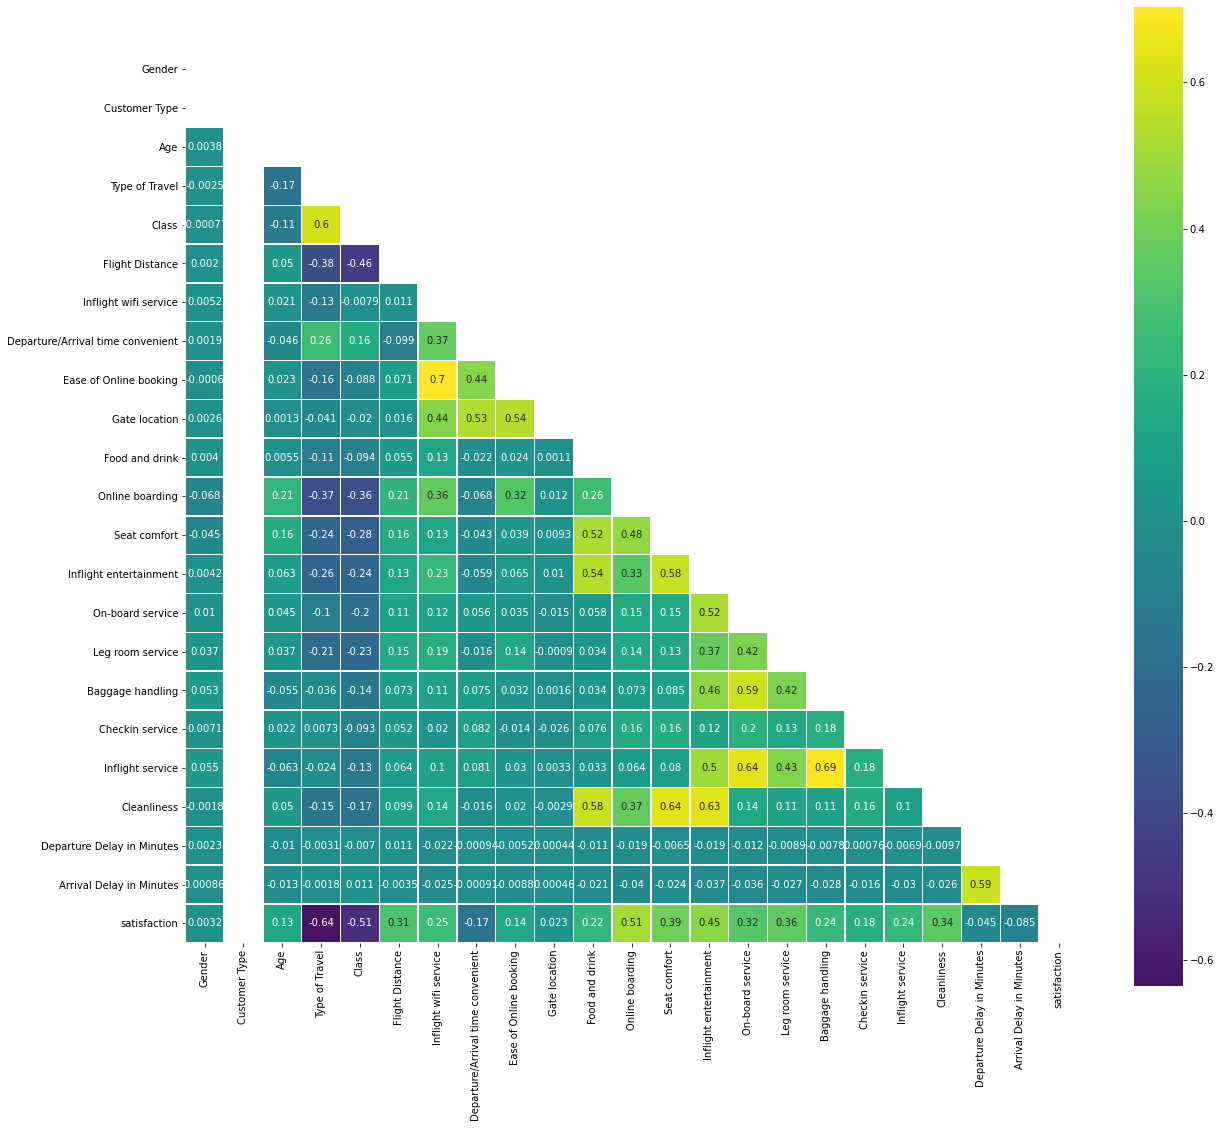

In [30]:
# Finding the correlation among the different features to check which ones are important

relation = df_train.corr()
m = np.triu(np.ones_like(relation, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(relation, mask=m, cmap='viridis', vmax=None, center=0,square=True, annot=True, linewidths=.5, 
            cbar_kws={"shrink": .9})

In [31]:
# Using Min Max Scaler to scale the values to remove the dominance of any single feature.

from sklearn import preprocessing
mms = preprocessing.MinMaxScaler()
mms.fit(df_train)
df_scaled = pd.DataFrame(mms.transform(df_train), columns=df_train.columns)
df_scaled.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1.0,0.0,0.076923,1.0,1.0,0.115789,0.6,0.8,0.6,0.2,...,1.0,0.8,0.6,0.75,0.666667,1.0,1.0,0.833333,0.56250,0.0
1,0.0,0.0,0.243590,0.0,0.0,0.299865,0.4,0.4,0.4,0.4,...,1.0,0.8,0.6,0.75,0.666667,0.8,1.0,0.000000,0.00000,1.0
2,1.0,0.0,0.692308,0.0,0.0,0.049393,0.6,0.6,0.6,0.6,...,0.6,0.6,0.8,0.75,0.333333,0.6,0.6,0.000000,0.00000,1.0
3,0.0,0.0,0.243590,1.0,0.5,0.310121,0.6,0.8,0.4,0.2,...,0.2,0.6,0.8,0.75,0.666667,0.8,0.2,0.000000,0.00000,0.0
4,1.0,0.0,0.512821,1.0,0.5,0.336032,0.4,0.8,0.4,0.6,...,0.4,0.6,0.6,0.75,0.333333,1.0,0.4,0.300000,0.71875,0.0


In [32]:
# Using Chi-Square Distribution to check which are the most relevant features.

from sklearn.feature_selection import SelectKBest, chi2
X = df_scaled.loc[:,df_scaled.columns!='satisfaction']
y = df_scaled[['satisfaction']]
best = SelectKBest(chi2, k=10)
best.fit(X, y)
X_new = best.transform(X)
print(X.columns[best.get_support(indices=True)])

Index(['Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Cleanliness'],
      dtype='object')


In [33]:
# Using Wrapper method to gain some more insights into the important features

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = df_train.drop('satisfaction', axis=1)
y = df_train['satisfaction']
best = SelectFromModel(rf(n_estimators=100, random_state=0))
best.fit(X, y)
sup = best.get_support()
feat = X.loc[:,sup].columns.tolist()
print(feat)

['Type of Travel', 'Class', 'Inflight wifi service', 'Online boarding', 'Seat comfort', 'Inflight entertainment']


In [34]:
# Confirming our result of best features using Eli5 library

import eli5 as e
from eli5.sklearn import PermutationImportance

pi = PermutationImportance(rf(n_estimators=100, random_state=0).fit(X,y),random_state=1).fit(X,y)
e.show_weights(pi, feature_names = X.columns.tolist())

Weight,Feature
0.2723 ± 0.0039,Type of Travel
0.1278 ± 0.0026,Inflight wifi service
0.0435 ± 0.0011,Online boarding
0.0424 ± 0.0013,Seat comfort
0.0355 ± 0.0009,Checkin service
0.0294 ± 0.0014,Inflight service
0.0289 ± 0.0008,Baggage handling
0.0246 ± 0.0006,Cleanliness
0.0177 ± 0.0007,On-board service
0.0172 ± 0.0007,Class


In [35]:
# Selecting relevant features using the analysis performed above

features = ['Type of Travel','Inflight wifi service','Online boarding','Seat comfort','Flight Distance',
            'Inflight entertainment','On-board service','Leg room service','Cleanliness','Checkin service', 
            'Inflight service', 'Baggage handling']
target = ['satisfaction']

In [36]:
# Splitting the datasets into dependent and independent features

X_train = df_train[features]
y_train = df_train[target].to_numpy()
X_test = df_test[features]
y_test = df_test[target].to_numpy()

In [37]:
# Using the Standard Scaler to normalize our features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [38]:
# Importing relevant libraries for calculating resulting metrics of our models

from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

In [39]:
# Creating a function to be used for implementing various machine leanring models

def classifier(model, X_train, y_train, X_test, y_test, verbose=True):
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy = {}".format(accuracy))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap='Blues', normalize = 'all')
    return model, accuracy

### Building Models

### 1. Logistic Regression

Accuracy = 0.8132891900215584
              precision    recall  f1-score   support

           0    0.88771   0.76381   0.82111     14573
           1    0.74384   0.87652   0.80475     11403

    accuracy                        0.81329     25976
   macro avg    0.81578   0.82017   0.81293     25976
weighted avg    0.82455   0.81329   0.81393     25976



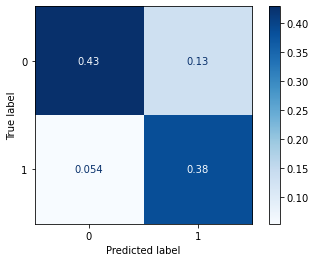

In [40]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'elasticnet', 'l1_ratio':0.5, 'solver': 'saga'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr = classifier(model_lr, X_train, y_train, X_test, y_test)

### 2. Gausian Naive Bayes

Accuracy = 0.8334616569140745
              precision    recall  f1-score   support

           0    0.87081   0.82564   0.84762     14573
           1    0.79102   0.84346   0.81640     11403

    accuracy                        0.83346     25976
   macro avg    0.83092   0.83455   0.83201     25976
weighted avg    0.83578   0.83346   0.83392     25976



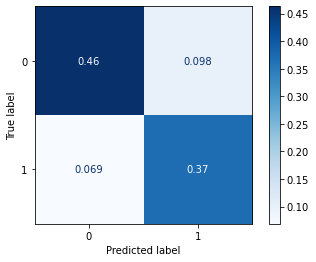

In [41]:
from sklearn.naive_bayes import GaussianNB

params_nb = {}

model_nb = GaussianNB(**params_nb)
model_nb, accuracy_nb = classifier(model_nb, X_train, y_train, X_test, y_test)

### 3. K-Nearest Neighbor

Accuracy = 0.8861256544502618
              precision    recall  f1-score   support

           0    0.91414   0.87964   0.89656     14573
           1    0.85326   0.89441   0.87335     11403

    accuracy                        0.88613     25976
   macro avg    0.88370   0.88703   0.88496     25976
weighted avg    0.88741   0.88613   0.88637     25976



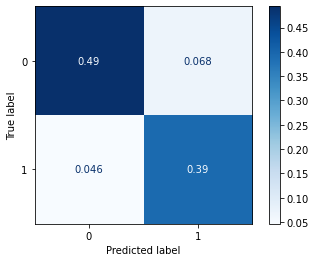

In [42]:
from sklearn.neighbors import KNeighborsClassifier

params_kn = {'n_neighbors':10, 'algorithm': 'kd_tree', 'n_jobs':4}

model_kn = KNeighborsClassifier(**params_kn)
model_kn, accuracy_kn = classifier(model_kn, X_train, y_train, X_test, y_test)

### 4. Decision Tree

Accuracy = 0.8824299353249153
              precision    recall  f1-score   support

           0    0.92578   0.85933   0.89132     14573
           1    0.83533   0.91195   0.87196     11403

    accuracy                        0.88243     25976
   macro avg    0.88055   0.88564   0.88164     25976
weighted avg    0.88607   0.88243   0.88282     25976



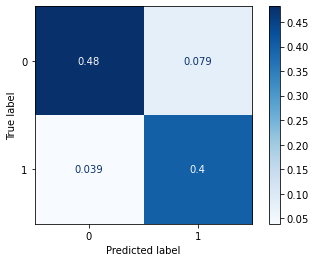

In [43]:
from sklearn.tree import DecisionTreeClassifier
params_dt = {'max_depth': 12,    
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt = classifier(model_dt, X_train, y_train, X_test, y_test)

### 5. Neural Networks

Accuracy = 0.8730366492146597
              precision    recall  f1-score   support

           0    0.94421   0.82227   0.87903     14573
           1    0.80504   0.93791   0.86641     11403

    accuracy                        0.87304     25976
   macro avg    0.87463   0.88009   0.87272     25976
weighted avg    0.88312   0.87304   0.87349     25976



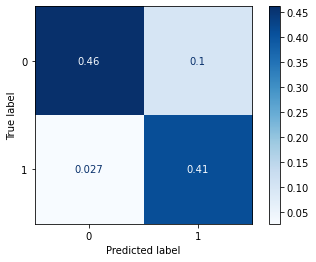

In [44]:
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 100}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn = classifier(model_nn, X_train, y_train, X_test, y_test)

### 6. Random Forest

Accuracy = 0.8941330458885125
              precision    recall  f1-score   support

           0    0.95723   0.84924   0.90001     14573
           1    0.83161   0.95150   0.88753     11403

    accuracy                        0.89413     25976
   macro avg    0.89442   0.90037   0.89377     25976
weighted avg    0.90208   0.89413   0.89453     25976



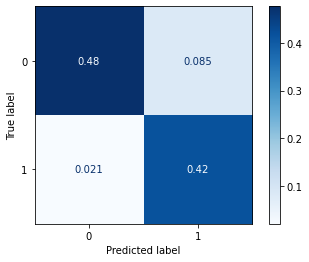

In [45]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf = classifier(model_rf, X_train, y_train, X_test, y_test)

### 7. XGBoost

[16:06:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy = 0.888820449645827
              precision    recall  f1-score   support

           0    0.95964   0.83703   0.89415     14573
           1    0.82096   0.95501   0.88293     11403

    accuracy                        0.88882     25976
   macro avg    0.89030   0.89602   0.88854     25976
weighted avg    0.89876   0.88882   0.88922     25976



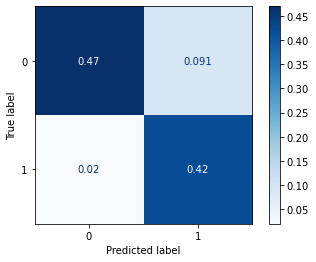

In [46]:
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb = classifier(model_xgb, X_train, y_train, X_test, y_test)

### 8. AdaBoost

Accuracy = 0.8955189405605174
              precision    recall  f1-score   support

           0    0.94313   0.86599   0.90291     14573
           1    0.84494   0.93326   0.88691     11403

    accuracy                        0.89552     25976
   macro avg    0.89403   0.89962   0.89491     25976
weighted avg    0.90002   0.89552   0.89589     25976



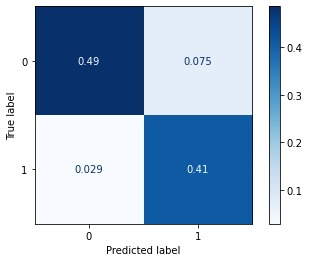

In [47]:
from sklearn.ensemble import AdaBoostClassifier as adab
params_adab ={'n_estimators': 500,
              'random_state': 12345}

model_adab = adab(**params_adab)
model_adab, accuracy_adab = classifier(model_adab, X_train, y_train, X_test, y_test)

In [48]:
# Creating a dataframe of the accuracies of various models implemented.

accuracies = [accuracy_lr,accuracy_nb,accuracy_kn,accuracy_dt,accuracy_nn,accuracy_rf,accuracy_xgb,accuracy_adab]
models = {'Model': ['Logistic Regression','Naive Bayes','K-NN','Decision Tree','Neural Network','Random Forest','XGBoost',
                    'AdaBoost'], 'Accuracy': accuracies}
data = pd.DataFrame(models)

In [49]:
# Having a look at the dataframe

data

,Model,Accuracy
0,Logistic Regression,0.813289
1,Naive Bayes,0.833462
2,K-NN,0.886126
3,Decision Tree,0.882430
4,Neural Network,0.873037
5,Random Forest,0.894133
6,XGBoost,0.888820
7,AdaBoost,0.895519


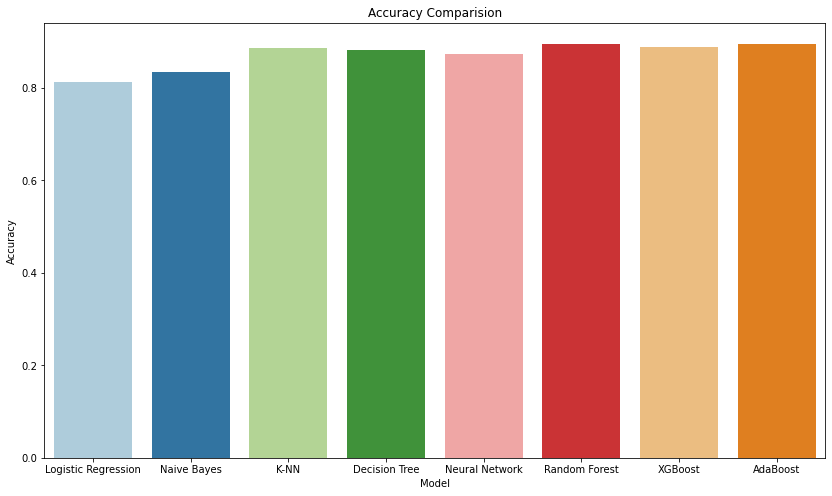

In [50]:
# Plotting a bar graph for visualzing the accuracies

ax = plt.subplots(figsize=(14,8))
ax = sns.barplot(x='Model', y='Accuracy', data = data, palette='Paired').set(title="Accuracy Comparision")

### Best Model - From the Accuracies and Bar Plot above, we can see that AdaBoost has the best accuracy of 89.55% followed by Random Forest which is not so behind with an accuracy score of 89.41% and the third best model is XGBoost which has an accuracy score of 88.88%